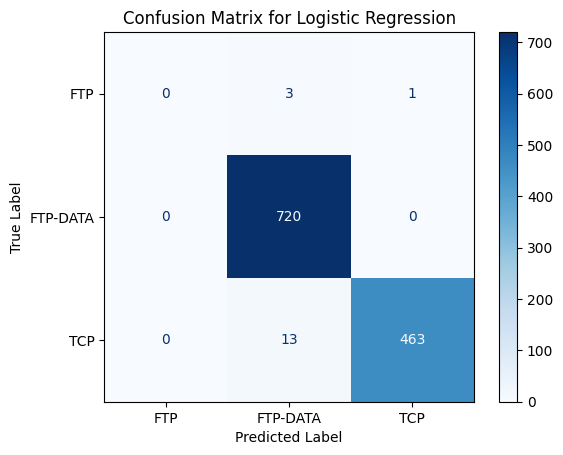

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data from the CSV file
csv_path = '/content/drive/MyDrive/Processed_Network_Traffic_Analysis.csv'
data = pd.read_csv(csv_path, sep=',')

# Preprocess the data
X = data[['Source', 'Destination', 'Length']]  # Features
y = data['Protocol']  # Target variable

# Apply one-hot encoding to categorical variables
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X = ct.fit_transform(X)

# Split the data into training and testing sets based on protocol vs source and destination ips
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model using OvR strategy
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

